In [1]:
import pickle
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from prettytable import PrettyTable

In [2]:
file = open('./Q2_data/X_train.pkl', 'rb')
x_train = pickle.load(file)
file.close()

file = open('./Q2_data/Y_train.pkl', 'rb')
y_train = pickle.load(file)
file.close()

file = open('./Q2_data/X_test.pkl', 'rb')
x_test_data = pickle.load(file)
file.close()

file = open('./Q2_data/Fx_test.pkl', 'rb')
y_test_data = pickle.load(file)
file.close()

In [3]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test_data = [[x] for x in x_test_data]

In [4]:
final_bias = []
final_variance = []

In [5]:
for degree in range(1, 10):
    bias = np.zeros(80)
    variance = np.zeros(80)
    y_predicted = []

    for set_iter in range(20):
        x_train_data = x_train[set_iter]
        y_train_data = y_train[set_iter]
        x_train_data = [[x] for x in x_train_data]

        polyFeature = PolynomialFeatures(degree)
        x_train_data = polyFeature.fit_transform(x_train_data)
        x_test_poly = polyFeature.fit_transform(x_test_data)

        reg = LinearRegression().fit(x_train_data, y_train_data)
        y_predicted = reg.predict(x_test_poly)
        bias = np.add(bias, y_predicted)
        variance = np.add(variance, y_predicted**2)

    bias /= 10                                          # E[y']
    variance /= 10                                      # E[y'^2]

    variance = np.subtract(variance, np.square(bias))   # var = E[y'^2] - E[y']^2
    bias = np.subtract(bias, y_test_data)               # bias = E[y'] - y
    bias = np.square(bias)
    
    final_bias.append(np.average(bias))
    final_variance.append(np.average(variance))

In [10]:
table = PrettyTable()
table.field_names = ["Degree", "Bias", "Variance"]

for i in range(9):
    table.add_row([i+1, final_bias[i], final_variance[i]])

print(table)

+--------+-------------------+---------------------+
| Degree |        Bias       |       Variance      |
+--------+-------------------+---------------------+
|   1    | 4879192.959843042 |  -9518913.382511023 |
|   2    | 4953090.214577658 |  -9571378.150594592 |
|   3    | 7554879.983984895 | -14015221.239361688 |
|   4    | 7565881.964715963 | -13898864.046500629 |
|   5    | 7498505.590180576 | -13706318.435791772 |
|   6    | 7574002.672777841 | -13699046.698723894 |
|   7    | 7426713.936046556 | -13470289.609511876 |
|   8    | 7413072.228709029 | -13363468.243552914 |
|   9    | 7416816.228046092 |  -13256188.6919313  |
+--------+-------------------+---------------------+


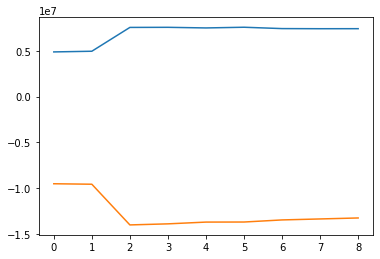

In [11]:
plt.plot(final_bias)
plt.plot(final_variance)
plt.show()